## Exercise 0

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

# a.
N = 100
mu = 1
sigma = 0.05
psi = np.random.rand(N, 1)

X = np.random.normal(mu, sigma, (N, 1))
y = (1.3 * (X**2)) + (4.8 * X) + 8 + psi

In [16]:
# b.
df_wine = pd.read_csv('winequality-red.csv', sep = ';')

df2_wine = df_wine.dropna()
df2_wine = df2_wine.dropna(axis=1)

dfn2_wine = (df2_wine - df2_wine.mean()) / df2_wine.std()

## Exercise 1

In [20]:
# 1.
d2_train = dfn2_wine.sample(frac=0.8, random_state=3116)
d2_test = dfn2_wine.drop(d2_train.index)

d2_train_x = d2_train.drop('quality', axis = 1).to_numpy()
d2_train_y = d2_train.quality.to_numpy().reshape(np.shape(d2_train_x)[0], 1)
d2_test_x = d2_test.drop('quality', axis = 1).to_numpy()
d2_test_y = d2_test.quality.to_numpy().reshape(np.shape(d2_test_x)[0], 1)


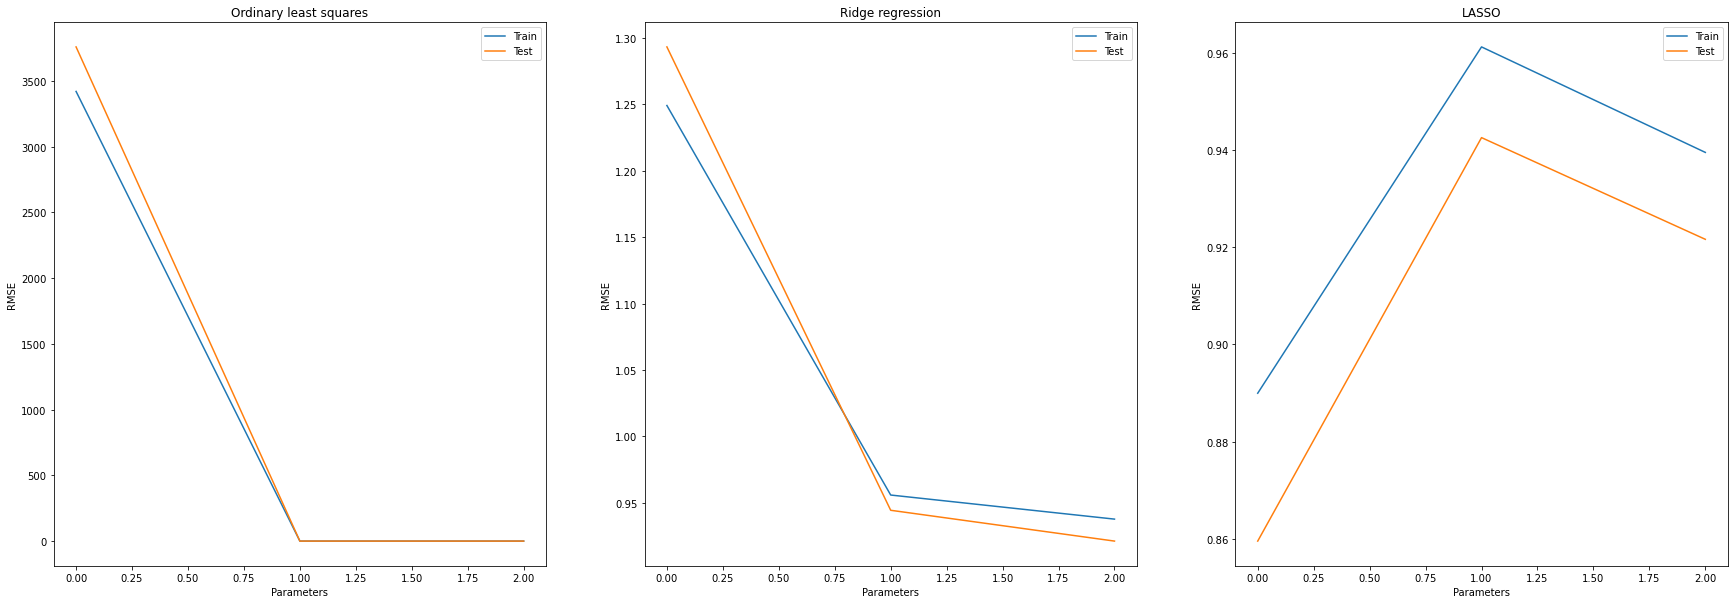

In [141]:
# 2.

muList, ns, lmbList  = np.array([0.1, 0.01, 0.001]), np.array([50, 250, 500]), np.array([0.1, 0.01, 0.001])
lse_train, lse_test, rid_train, rid_test, lass_train, lass_test = [], [], [], [], [], []

paramList = zip(muList, lmbList, ns)

for i, j, k in paramList:
    modl = SGDRegressor(max_iter = k, learning_rate = 'constant', eta0 = i, alpha = 0, penalty = None)
    modl.fit(d2_train_x, d2_train_y)
    y_pred = modl.predict(d2_train_x)
    lse_train.append(np.sqrt(np.square(d2_train_y - y_pred)).mean())
    yhat = modl.predict(d2_test_x)
    lse_test.append(np.sqrt(np.square(d2_test_y - yhat)).mean())

    modl2 = SGDRegressor(max_iter = k, learning_rate = 'constant', eta0 = i, alpha = j,  penalty = "l2")
    modl2.fit(d2_train_x, d2_train_y)
    y_pred = modl2.predict(d2_train_x)
    rid_train.append(np.sqrt(np.square(d2_train_y - y_pred)).mean())
    yhat = modl2.predict(d2_test_x)
    rid_test.append(np.sqrt(np.square(d2_test_y - yhat)).mean())

    modl3 = SGDRegressor(max_iter = k, learning_rate = 'constant', eta0 = i, alpha = j, penalty = "l1")
    modl3.fit(d2_train_x, d2_train_y)
    y_pred = modl3.predict(d2_train_x)
    lass_train.append(np.sqrt(np.square(d2_train_y - y_pred)).mean())
    yhat = modl3.predict(d2_test_x)
    lass_test.append(np.sqrt(np.square(d2_test_y - yhat)).mean())


plt.figure(figsize=(30, 10))
plt.subplot(1, 3, 1)
plt.plot(lse_train, label = 'Train')
plt.plot(lse_test, label='Test')
plt.xlabel('Parameters')
plt.ylabel('RMSE')
plt.title('Ordinary least squares')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(rid_train, label = 'Train')
plt.plot(rid_test, label='Test')
plt.xlabel('Parameters')
plt.ylabel('RMSE')
plt.title('Ridge regression')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(lass_train, label = 'Train')
plt.plot(lass_test, label='Test')
plt.xlabel('Parameters')
plt.ylabel('RMSE')
plt.title('LASSO')
plt.legend()

plt.show()

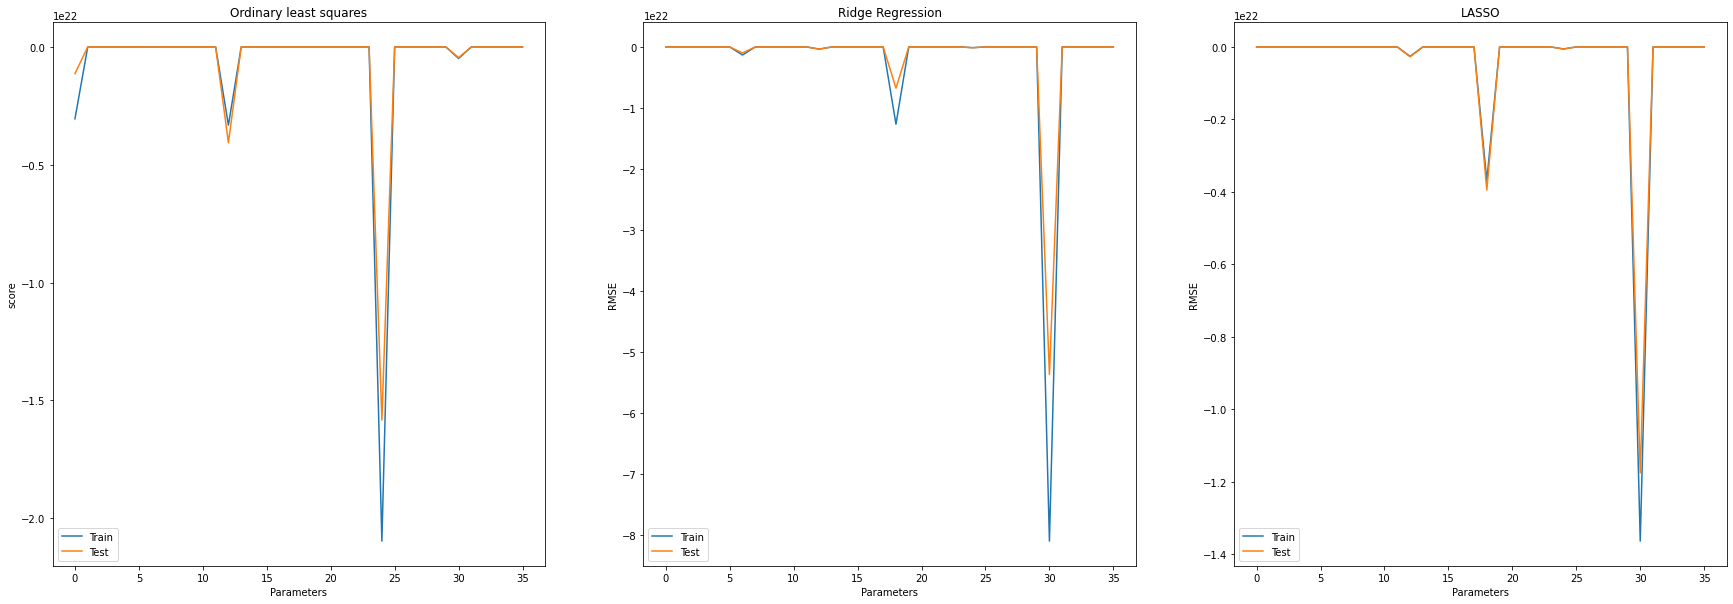

In [67]:
# 3.

d2_train_x = d2_train.drop('quality', axis = 1).to_numpy()
d2_train_y = d2_train.quality.to_numpy().reshape(np.shape(d2_train_x)[0], 1)

d2_test_x = d2_test.drop('quality', axis = 1).to_numpy()
d2_test_y = d2_test.quality.to_numpy().reshape(np.shape(d2_test_x)[0], 1)

ridge_cv = GridSearchCV(SGDRegressor(penalty = 'l2'), {'eta0': 10.0 ** -np.arange(1, 7),
                                                    'alpha': 10.0 ** -np.arange(1, 7),
                                                     'learning_rate': ['constant']}, return_train_score = True)
ridge_cv.fit(d2_train_x, d2_train_y)

lasso_cv = GridSearchCV(SGDRegressor(penalty = 'l1'), {'eta0': 10.0 ** -np.arange(1, 7),
                                                    'alpha': 10.0 ** -np.arange(1, 7),
                                                     'learning_rate': ['constant']}, return_train_score=True)
lasso_cv.fit(d2_train_x, d2_train_y)

ols_cv = GridSearchCV(SGDRegressor(penalty = None), {'eta0': 10.0 ** -np.arange(1, 7), 
                                                  'alpha': 10.0 ** -np.arange(1, 7),
                                                   'learning_rate': ['constant']}, return_train_score = True)
ols_cv.fit(d2_train_x, d2_train_y)


#Plotting 
plt.figure(figsize=(30, 10))

plt.subplot(1, 3, 1)
plt.plot(ols_cv.cv_results_["mean_train_score"], label = 'Train')
plt.plot(ols_cv.cv_results_["mean_test_score"], label = 'Test')
plt.xlabel('Parameters')
plt.ylabel('score')
plt.title('Ordinary least squares')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(ridge_cv.cv_results_["mean_train_score"], label = 'Train')
plt.plot(ridge_cv.cv_results_["mean_test_score"], label = 'Test')
plt.xlabel('Parameters')
plt.ylabel('RMSE')
plt.title('Ridge Regression')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(lasso_cv.cv_results_["mean_train_score"], label = 'Train')
plt.plot(lasso_cv.cv_results_["mean_test_score"], label = 'Test')
plt.xlabel('Parameters')
plt.ylabel('RMSE')
plt.title('LASSO')
plt.legend()

plt.tight_layout
plt.show()

Ordinary Least Squares :  91.95574652092724
Ridge Regression :  92.76130995850289
Lasso :  91.4930822744193


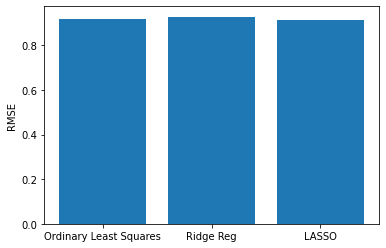

In [76]:
# 4.

yhat = ridge_cv.predict(d2_test_x)
ridge_tr = np.sqrt(np.square(d2_test_y - yhat)).mean()

yhat = lasso_cv.predict(d2_test_x)
lasso_tr = np.sqrt(np.square(d2_test_y - yhat)).mean()

yhat = ols_cv.predict(d2_test_x)
ols_tr = np.sqrt(np.square(d2_test_y - yhat)).mean()

plt.bar(['Ordinary Least Squares','Ridge Reg','LASSO'], [ols_tr, ridge_tr, lasso_tr])
plt.ylabel('RMSE')

print('Ordinary Least Squares : ', ols_tr * 100)
print('Ridge Regression : ', ridge_tr * 100)
print('Lasso : ', lasso_tr * 100)


## Exercise 2

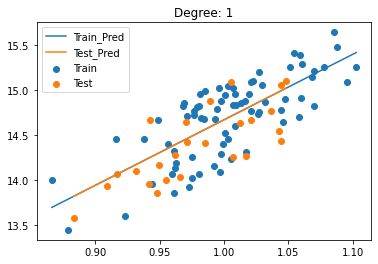

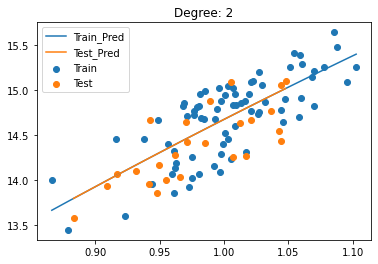

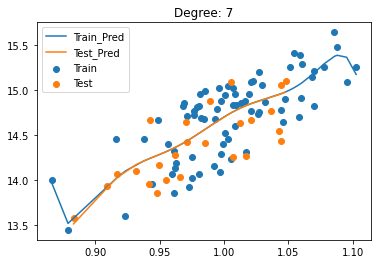

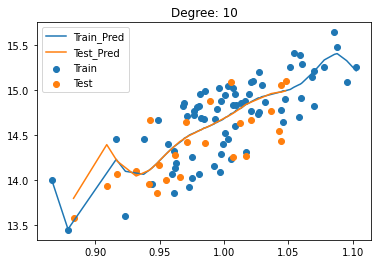

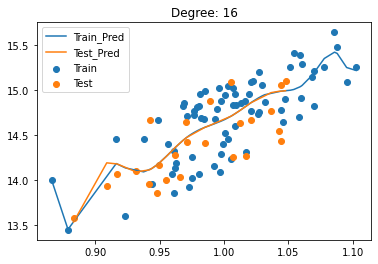

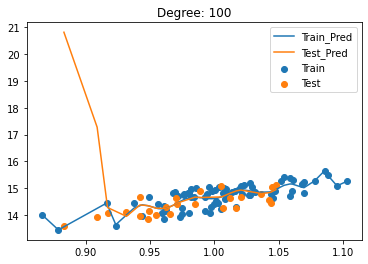

In [142]:
# 1. 

train_x, test_x, train_y, test_y = train_test_split(X, y, random_state = 3116)

degreeList = [1, 2, 7, 10, 16, 100]

for deg in degreeList:
    features = PolynomialFeatures(deg)
    tr = features.fit_transform(train_x)
    te = features.fit_transform(test_x)
    lr = LinearRegression().fit(tr, train_y)
    train_pred = lr.predict(tr)
    test_pred = lr.predict(te)

    x1, y1, pred1 = list(zip(*sorted(zip(list(train_x.flatten()),list(train_y.flatten()),list(train_pred.flatten())))))
    x2, y2, pred2 = list(zip(*sorted(zip(list(test_x.flatten()),list(test_y.flatten()),list(test_pred.flatten())))))

    plt.scatter(x1, y1, label='Train')
    plt.scatter(x2, y2, label='Test')
    plt.plot(x1, pred1, label='Train_Pred')
    plt.plot(x2, pred2, label='Test_Pred')
    plt.title('Degree: ' + str(deg))
    plt.legend()
    plt.show()



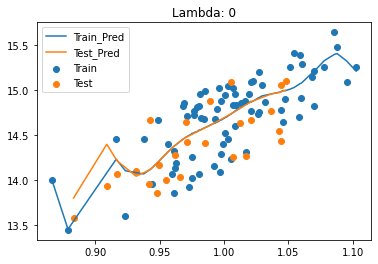

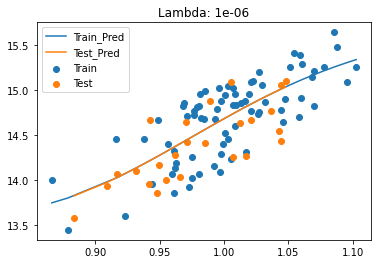

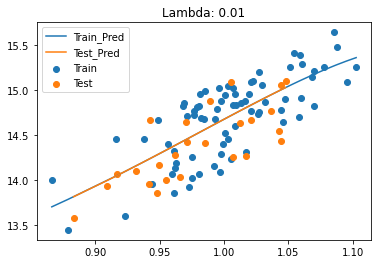

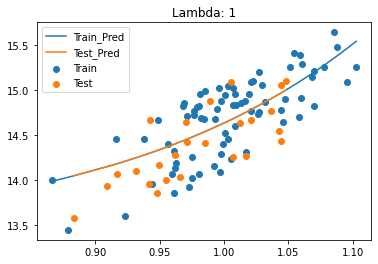

In [92]:
# 2.

train_x, test_x, train_y, test_y = train_test_split(X, y, random_state = 3116)

features = PolynomialFeatures(10)
tr = features.fit_transform(train_x)
te = features.fit_transform(test_x)

lmbList = [0, 10**-6, 10**-2, 1]

for lmb in lmbList:
    ridge = Ridge(alpha = lmb).fit(tr, train_y)
    train_pred = ridge.predict(tr)
    test_pred = ridge.predict(te)
    x1, y1, pred1 = list(zip(*sorted(zip(list(train_x.flatten()), list(train_y.flatten()), list(train_pred.flatten())))))
    x2, y2, pred2 = list(zip(*sorted(zip(list(test_x.flatten()), list(test_y.flatten()), list(test_pred.flatten())))))

    plt.scatter(x1, y1, label='Train')
    plt.scatter(x2, y2, label='Test')
    plt.plot(x1, pred1, label='Train_Pred')
    plt.plot(x2, pred2, label='Test_Pred')
    plt.title('Lambda: ' + str(lmb))
    plt.legend()
    plt.show()
    


## Exercise 3

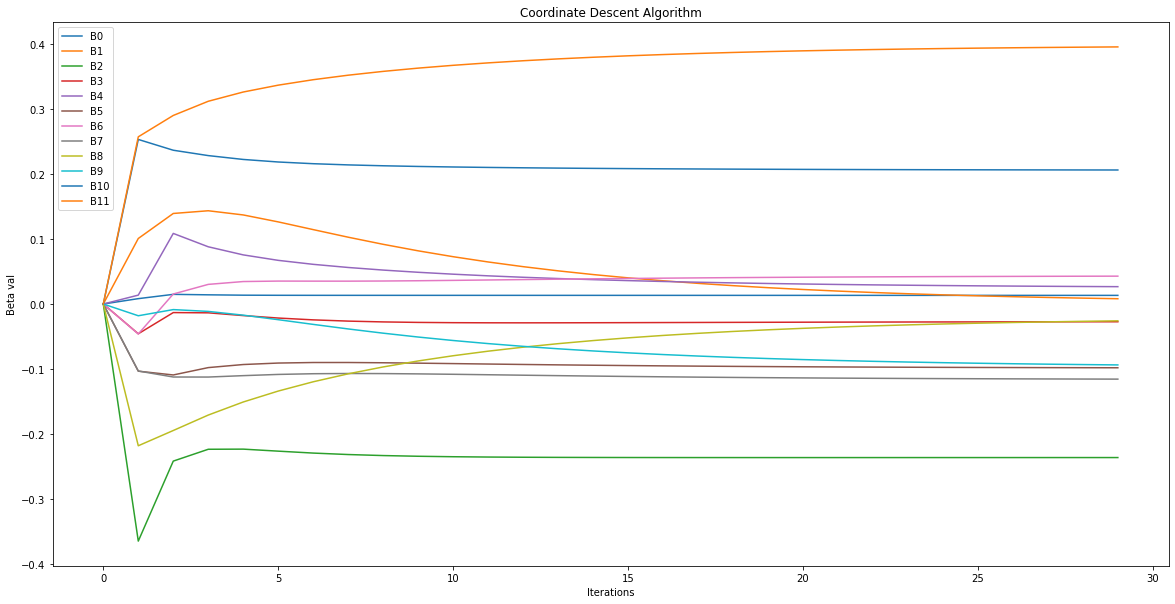

In [129]:
# 1.

def minimize_CD(matX, matY, betas, n):
    betaList = np.zeros((np.shape(betas)[0], n))
    betaList[:, 0] = betas[:, 0]    
    for i in range(1, n):
        betaList[:, i] = betaList[:, i-1]
        for j in range(np.shape(betaList)[0]):
            tempBetas = betaList[:, i].reshape(np.shape(betaList)[0], 1)
            x1 = matX[:, j].reshape(np.shape(matX)[0], 1)
            x2 = np.delete(matX, j, 1)
            b = np.delete(tempBetas, j, 0)
            betaList[j, i] = np.asscalar(((matY - x2 @ b).T @ x1)) / np.asscalar(x1.T @ x1)
    return betaList


N = 30
# a. learn-linreg-CD 
train_x = d2_train.drop('quality', axis = 1).to_numpy()
train_y = d2_train.quality.to_numpy().reshape(np.shape(train_x)[0], 1)
train_x = np.append(np.ones((np.shape(train_x)[0], 1)), train_x, axis = 1)

test_x = d2_test.drop('quality', axis = 1).to_numpy()
test_y = d2_test.quality.to_numpy().reshape(np.shape(test_x)[0], 1)
test_x = np.append(np.ones((np.shape(test_x)[0], 1)), test_x, axis = 1)

betas = np.zeros((np.shape(train_x)[1], 1))
betaList = minimize_CD(train_x, train_y, betas, N)

# b.
plt.figure(figsize=(20, 10))
for i in range(np.shape(betaList)[0]):
    plt.plot(np.arange(N), betaList[i, :], label = 'B' + str(i))
plt.xlabel('Iterations')
plt.ylabel('Beta val')  
plt.title('Coordinate Descent Algorithm')
plt.legend()
plt.show()

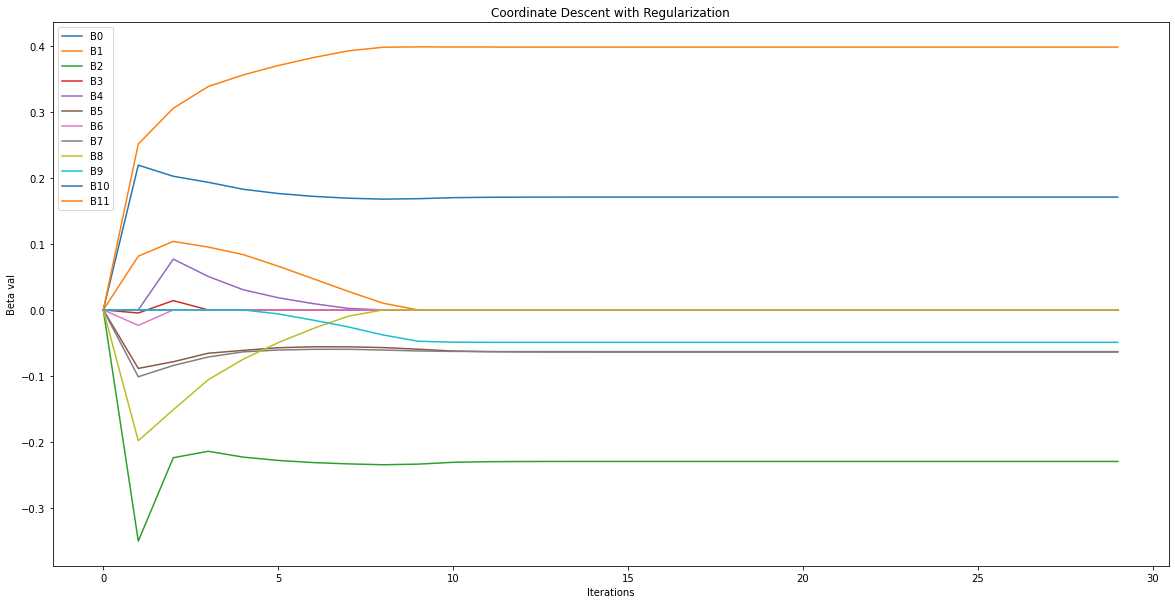

In [130]:
# 2.

def minimize_CD(X, Y, betas, n, lmb):
    betaList = np.zeros((np.shape(betas)[0], n))
    betaList[:, 0] = betas[:, 0]

    for i in range(1,n):
        betaList[:, i] = betaList[:,i - 1]

        for j in range(np.shape(betaList)[0]):
            tempBeta = betaList[:, i].reshape(np.shape(betaList)[0], 1)
            x1 = X[:, j].reshape(np.shape(X)[0], 1)
            x2 = np.delete(X, j, 1)
            bxm = np.delete(tempBeta, j, 0)
            a = np.asscalar(((Y - x2 @ bxm).T @ x1)) / np.asscalar(x1.T @ x1)
            b = 0.5 * lmb / np.asscalar(x1.T @ x1)
            betaList[j,i] = soft(a, b)
    return betaList

def soft(a, b):
    if a > b:
        y = a - b
    elif np.abs(a) <= b:
        y = 0
    elif a < b * -1:
        y = a + b
    return y

N = 30
lmb = 50

# a. learn_linreg_l1reg_CD
train_x = d2_train.drop('quality', axis = 1).to_numpy()
train_y = d2_train.quality.to_numpy().reshape(np.shape(train_x)[0], 1)
train_x = np.append(np.ones((np.shape(train_x)[0],1)), train_x, axis = 1)

test_x = d2_test.drop('quality', axis = 1).to_numpy()
test_y = d2_test.quality.to_numpy().reshape(np.shape(test_x)[0], 1)
test_x = np.append(np.ones((np.shape(test_x)[0], 1)), test_x, axis = 1)

betaList2 = minimize_CD(train_x, train_y, np.zeros((np.shape(train_x)[1],1)), N, lmb)

# b.
plt.figure(figsize=(20, 10))
for i in range(np.shape(betaList2)[0]):
    plt.plot(np.arange(N), betaList2[i, :], label = 'B' + str(i))
plt.xlabel('Iterations')
plt.ylabel('Beta val')
plt.title('Coordinate Descent with Regularization')
plt.legend()   
plt.show()
    


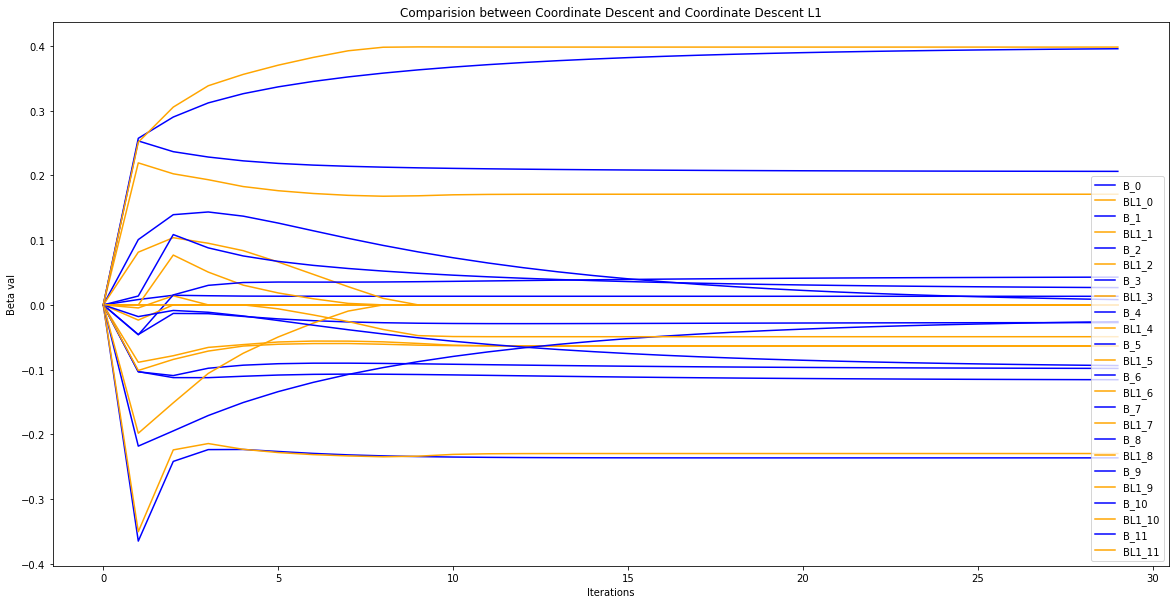

In [138]:
# 3.

plt.figure(figsize=(20, 10))
for i in range(np.shape(betaList)[0]):
    plt.plot(np.arange(N), betaList[i,:], label='B_'+ str(i), color='blue')
    plt.plot(np.arange(N), betaList2[i,:], label='BL1_'+ str(i), color='orange')
plt.xlabel('Iterations')
plt.ylabel('Beta val')
plt.title('Comparision between Coordinate Descent and Coordinate Descent L1')
plt.legend()   
plt.show()